<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot. 
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [68]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [69]:
image = np.array(Image.open('../../Images/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image 
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`

In [70]:
## Printing the shape of the image using iamge.shape that returns a tuple representing the dimensions
## height, width, channels

print("Shape of the original image:", image.shape)

Shape of the original image: (100, 100, 3)


In [71]:
## new variable called img_single_channel that is equivalent to the last color channel of image using [:, :, -1], 
## color channels are stored in 3D array.
##first : (colon) refers to the rows of the array and indicates that select all rows.
##second : (colon) refers to the columns of the array and indicates that select all columns.
##-1 is used as an index in the third position. It refers to the last element in a sequence. 

img_single_channel = image[:, :, -1]

In [72]:
## Using .shape of img_single_channel to check that it has the same number of pixels as the original image.

print("Shape of img_single_channel:", img_single_channel.shape)

Shape of img_single_channel: (100, 100)


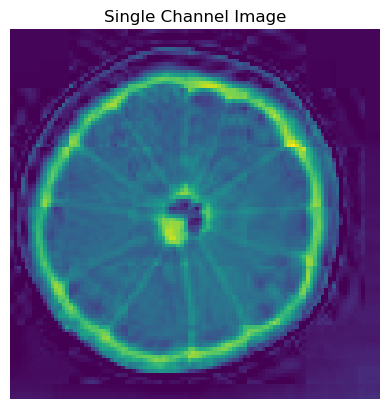

In [73]:
plt.imshow(img_single_channel)  # 'cmap' specifies grayscale colormap
plt.title("Single Channel Image")
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

Shape of img_average_channel: (100, 100)


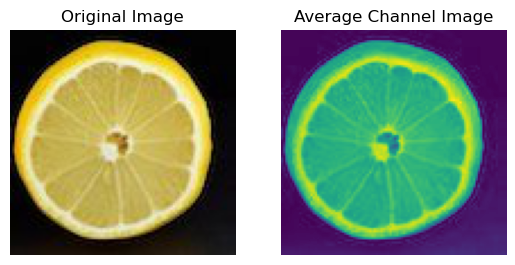

In [74]:
## 1 new variable called img_average_channel that is equivalent to the average of all three color channels of image

img_average_channel = np.mean(image, axis=2)

## 2 printing shape 

print("Shape of img_average_channel:", img_average_channel.shape)

# 3 Use plt.imshow to plot the original image (image)
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Use plt.imshow to plot the average channel image (img_average_channel)
plt.subplot(1, 2, 2)
plt.imshow(img_average_channel,)  # 'cmap' specifies grayscale colormap
plt.title("Average Channel Image")
plt.axis('off')

plt.show()

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

## Part 3 Answers:

1)  An identity matrix is characterised by the following property:

    a) Number of Rows = number of columns.
    
    b) The diagonal elements of an identity matrix are all set to 1.
    
    c) All the elements outside the diagonal (off-diagonal elements) are set to 0.
    

In [75]:
# 2 Determine the size of the identity matrix based on img_average_channel's shape
rows, cols = img_average_channel.shape

# Create an identity matrix with the same size as img_average_channel
identity_matrix = np.eye(rows, cols)

# Print the identity matrix
print("Identity Matrix:")
print(identity_matrix)

Identity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [76]:
## Print a random row out of identity_matrix

identity_matrix = np.eye(rows, cols)

# Generate a random row index
random_row_index = np.random.randint(0, rows)

# Get and print the random row from the identity_matrix
random_row = identity_matrix[random_row_index, :]

print("Random Row from Identity Matrix:")
print(random_row)

Random Row from Identity Matrix:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`. 

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [77]:
# Determine the number of rows in img_average_channel
num_rows = img_average_channel.shape[0]

# Create an array of indices from 0 to N-1
indices = np.arange(num_rows)

# Shuffle the indices using numpy.random.shuffle
np.random.shuffle(indices)

# Assign the shuffled array the name "rows"
rows = indices

# Print the shuffled array
print("Shuffled Indices (rows):")
print(rows)

Shuffled Indices (rows):
[91  3  7 79 64 40 22 27 52 47 61 66 42 14 17 70 31 35 60 16  4 59 63 95
 30 13 87 77 78 58 93 53 80 62 48 65  8  9 29 51 98 21 11 75 49 46 69 71
  1 38  5 55 23 56 15 96 92  2 41 74 36 84 73 43 86 99 34 19 57  6 76 97
  0 54 45 44 67 83 81 85 94 24 25 18 72 28 20 82 88 50 89 26 33 32 39 37
 12 10 68 90]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


## In this section we are trying to achieve:

1) Shuffling Rows: We used the shuffled array of row indices, "rows," to rearrange the rows of identity_matrix. This means that the rows in T follow a new order based on the random shuffling of indices while preserving the elements within each row.

2) Description of Matrix T: Matrix T is essentially the identity matrix identity_matrix with its rows shuffled. In other words, T is a permutation of the rows of the identity matrix, where each row is in a different position, following the order defined by the "rows" array.

3) Sanity Check: We printed the shape of T to ensure that it has the same size as both identity_matrix and img_average_channel. If needed, we would have reshaped it to match the desired size. However, reshaping is not necessary since the dimensions should already match if the shuffling was done correctly.

Rearrangement or permutation of data elements to create new representations while preserving the original data's characteristics. The shuffled row indices define the transformation's order, which can be further analyzed to extract patterns or features from the data.


In [78]:
# Use the shuffled row indices to create matrix T from identity_matrix
T = identity_matrix[rows]

# Sanity check: Print the shape of T
print("Shape of T:", T.shape)

Shape of T: (100, 100)


## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see. 
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image. 

Shape of transformed_image: (100, 100)


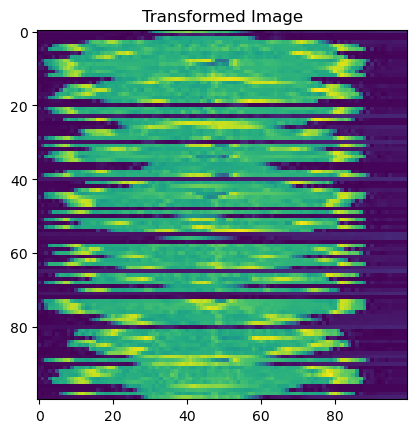

In [79]:
# 1 Matrix multiplication of T and img_average_channel
transformed_image = np.dot(T, img_average_channel)

# Check the shape of the result
print("Shape of transformed_image:", transformed_image.shape)

# 2 Plot transformed_image
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis('on')
plt.show()


## Interpretation of the Result:

transformed_image: This prints the shape of transformed_image, which should provide information about the dimensions of the result.

Plotting transformed_image: We use plt.imshow() to visualize transformed_image as a grayscale image. This will allow us to observe the pattern in the transformed image.

Interpreting the Transformation: Each dot product in the matrix multiplication (between the rows of T and the columns of img_average_channel) computes a weighted sum. Specifically, it takes a row from T, which represents a permutation of the identity matrix, and multiplies it element-wise with a column from img_average_channel, effectively selecting and rearranging rows from img_average_channel. The result of the dot product is a new row for transformed_image.

Essentially, this transformation is rearranging the rows of img_average_channel based on the order specified by the shuffled rows in T. It's like shuffling the rows of the original image to create a new image with the same pixel values but in a different order.

The pattern observed in transformed_image will depend on the specific permutation defined by shuffled rows in T. It's essentially a reordering of the rows of the original image, resulting in a different visual pattern.

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

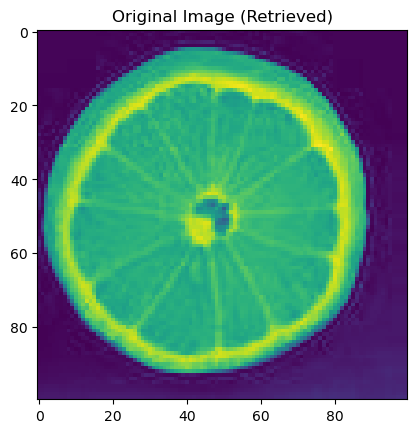

In [80]:
# 1 Check if matrix T is invertible (by checking if its determinant is non-zero)
det_T = np.linalg.det(T)

is_invertible = det_T != 0

if is_invertible:
    # 2 Compute the inverse of T
    T_inv = inv(T)

    # 3 Perform the inverse of the scrambling operation
    retrieved_image = np.dot(T_inv, transformed_image)

    # Plot the retrieved image
    plt.imshow(retrieved_image)
    plt.title("Original Image (Retrieved)")
    plt.axis('on')
    plt.show()
else:
    print("Matrix T is not invertible, so the operation cannot be reversed.")

## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


T_columns is: 
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Transpose of shuffled columns is: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


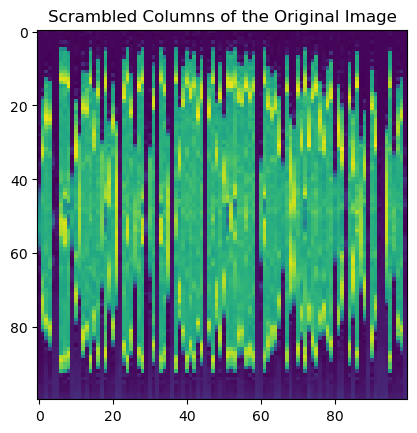

In [81]:
# Determine the number of columns in img_average_channel
num_columns = img_average_channel.shape[1]

# Create an array of indices from 0 to M-1 (M is the number of columns)
column_indices = np.arange(num_columns)

# Shuffle the column indices using numpy.random.shuffle
np.random.shuffle(column_indices)

# Create a new identity matrix for columns
identity_matrix_columns = np.eye(num_columns)

# Use the shuffled column indices to create matrix T_columns from identity_matrix_columns
T_columns = identity_matrix_columns[column_indices]

print("T_columns is: \n",T_columns)
# Transpose T_columns to shuffle columns (transpose of a permutation matrix is its inverse)
T_columns = T_columns.T

print("\n Transpose of shuffled columns is: \n",T_columns)

# Perform matrix multiplication between img_average_channel and T_columns
transformed_image_columns = np.dot(img_average_channel, T_columns)

# Plot the scrambled columns of the original image
plt.imshow(transformed_image_columns)
plt.title("Scrambled Columns of the Original Image")
plt.axis('on')
plt.show()

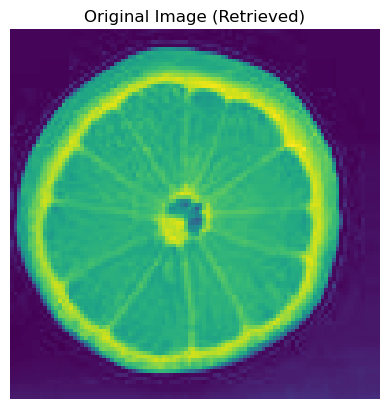

In [82]:
# Check if matrix T_columns is invertible (by checking if its determinant is non-zero)
det_T_columns = np.linalg.det(T_columns)
is_invertible_columns = det_T_columns != 0

if is_invertible_columns:
    # Compute the inverse of T_columns
    Tinv_columns = inv(T_columns)

    # Perform the inverse of the scrambling operation
    retrieved_image_columns = np.dot(transformed_image_columns, Tinv_columns)

    # Plot the retrieved original image
    plt.imshow(retrieved_image_columns)
    plt.title("Original Image (Retrieved)")
    plt.axis('off')
    plt.show()
else:
    print("Matrix T_columns is not invertible, so the operation cannot be reversed.")


## Part 9: Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image. 

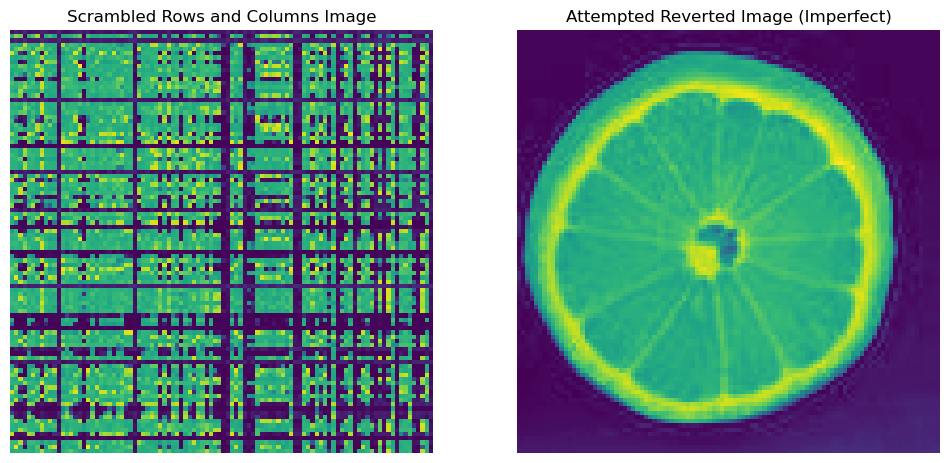

In [83]:
# Create shuffled row and column indices independently.
row_indices = np.arange(num_rows)
column_indices = np.arange(num_columns)
np.random.shuffle(row_indices)
np.random.shuffle(column_indices)

# Create random permutation matrices for rows and columns.
row_permutation_matrix = np.eye(num_rows)[row_indices]
column_permutation_matrix = np.eye(num_columns)[column_indices]

# Scramble the image by applying random permutations to both rows and columns.
scrambled_image = np.dot(np.dot(row_permutation_matrix, img_average_channel), column_permutation_matrix)

# Attempt to revert the scrambled image (using transposes).
reverted_image = np.dot(np.dot(row_permutation_matrix.T, scrambled_image), column_permutation_matrix.T)

# Plot the scrambled
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(scrambled_image)
plt.title("Scrambled Rows and Columns Image")
plt.axis('off')

# Plot attempted reverted images
plt.subplot(1, 2, 2)
plt.imshow(reverted_image)
plt.title("Attempted Reverted Image (Imperfect)")
plt.axis('off')

plt.show()

References: https://www.w3schools.com/python/numpy/numpy_intro.asp#:~:text=NumPy%20is%20a%20Python%20library,%2C%20fourier%20transform%2C%20and%20matrices.

https://matplotlib.org/cheatsheets/

https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

https://numpy.org/doc/stable/reference/generated/numpy.dot.html